In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

In [2]:
from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

In [3]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [4]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\harder1.jpg', '../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [5]:
# Read in an image
image = mpimg.imread('../test_images/test6.jpg')
print(image.shape)

#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

(720, 1280, 3)
(720, 1280, 3)


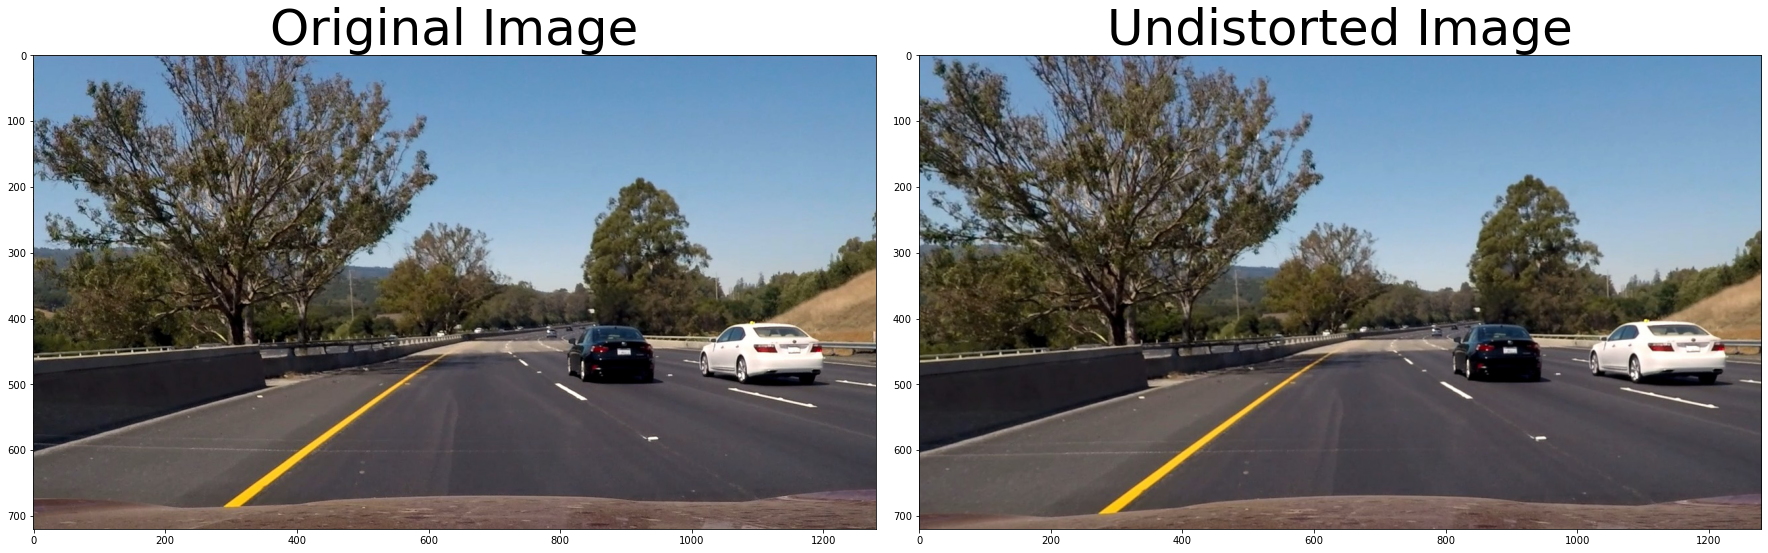

In [6]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [7]:
from scripts.my_pipeline import pipeline

In [8]:
color_binary,combined_binary= pipeline(dst,channel='s',color_thresh=(110,255), orient='x', sobel_thresh=(20, 100))

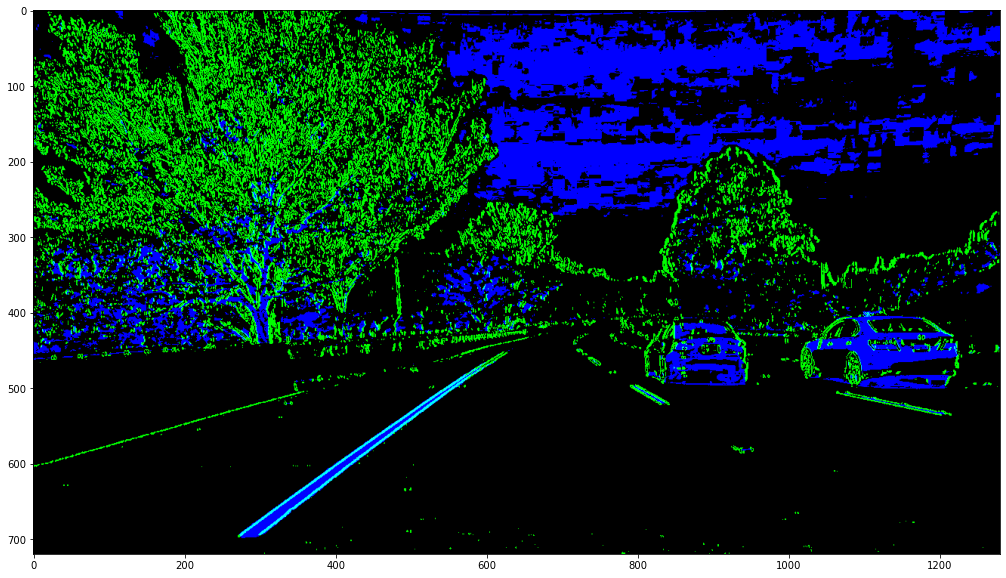

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(color_binary)

In [11]:
towrite = cv2.cvtColor(color_binary, cv2.COLOR_RGB2BGR)
cv2.imwrite('../output_images/color_binary6.jpg',towrite)

True

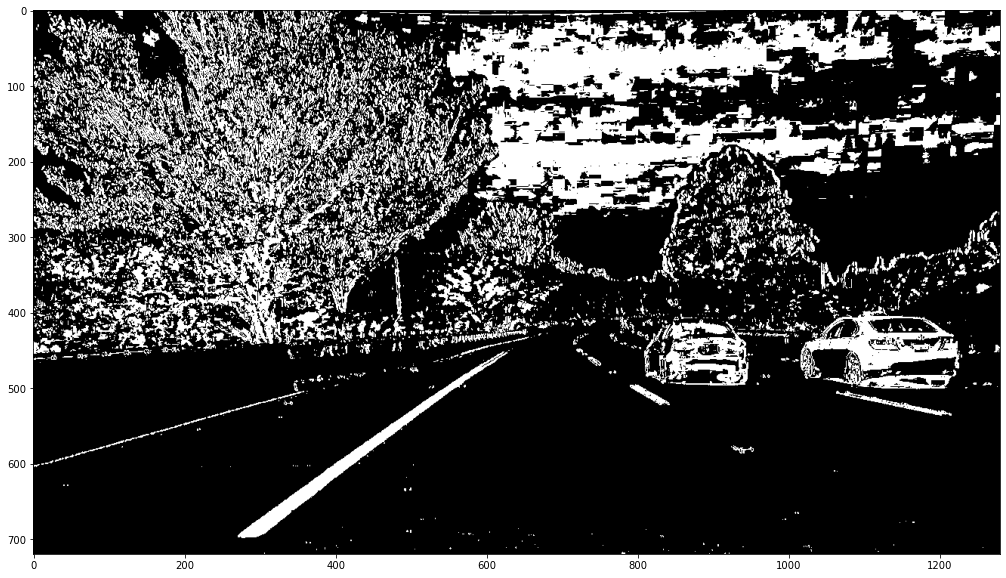

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(combined_binary,cmap="gray")

In [16]:
plt.imsave('../output_images/combined_binary6.jpg', combined_binary, cmap='gray')

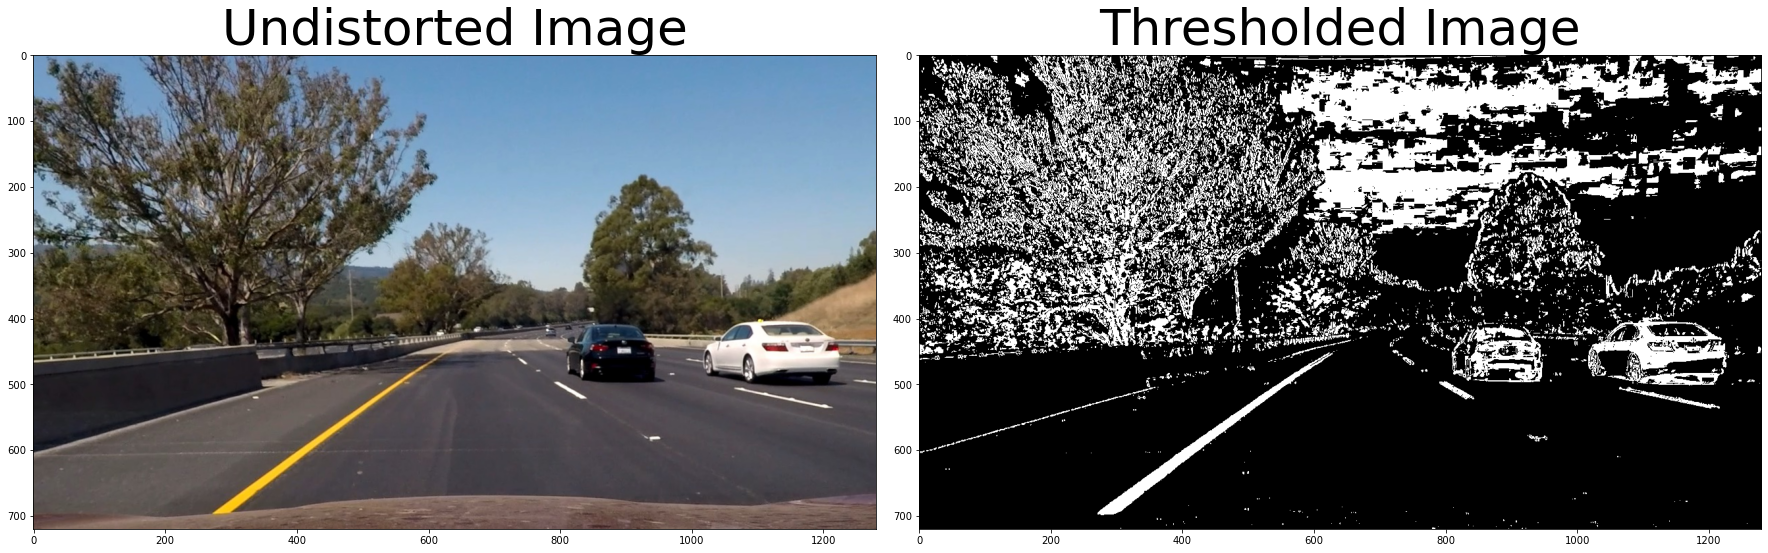

In [17]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(combined_binary,cmap="gray")
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [18]:
f.savefig('../output_images/undistorted_thresholded6.jpg')